In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from time import process_time 
from src.FunctionsProperties import *
import statsmodels.api as sm
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally

In [2]:
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
df = df[df["alpha_g"]>=1.0]
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

N  dim  alpha_a  alpha_g  N_samples  short_mean  short_err  \
0  160000    1      1.5      2.0         32   17.016344   0.179353   
1  160000    1      1.2      2.0         22   15.856327   0.206126   
2  160000    1     11.0      2.0         13   22.203923   0.320422   
3  160000    1      2.0      4.0         14   18.810779   0.258948   
4  160000    1      2.0      1.0         13   20.459969   0.803095   

   short_err_per  diameter_mean  diameter_err  diameter_err_per  \
0       1.054003      43.781250      0.538319          1.229565   
1       1.299964      41.681818      0.589909          1.415268   
2       1.443088      54.076923      2.525413          4.670039   
3       1.376592      47.428571      0.816817          1.722204   
4       3.925202      51.384615      1.806464          3.515574   

   ass_coeff_mean  ass_coeff_err  ass_coeff_err_per  
0       -0.024530       0.000853           3.476212  
1       -0.035214       0.001480           4.203271  
2        0.060780       0.000569           0.936218  
3       -0.010559       0.000919           8.701416  
4       -0.011740       0.001629          13.872442

In [3]:
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000]
dim = [1,2,3,4]
alpha_filter = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
parameters_calculate(df, N, dim, alpha_filter)

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_G$ FOR MULTIPLIES $N$

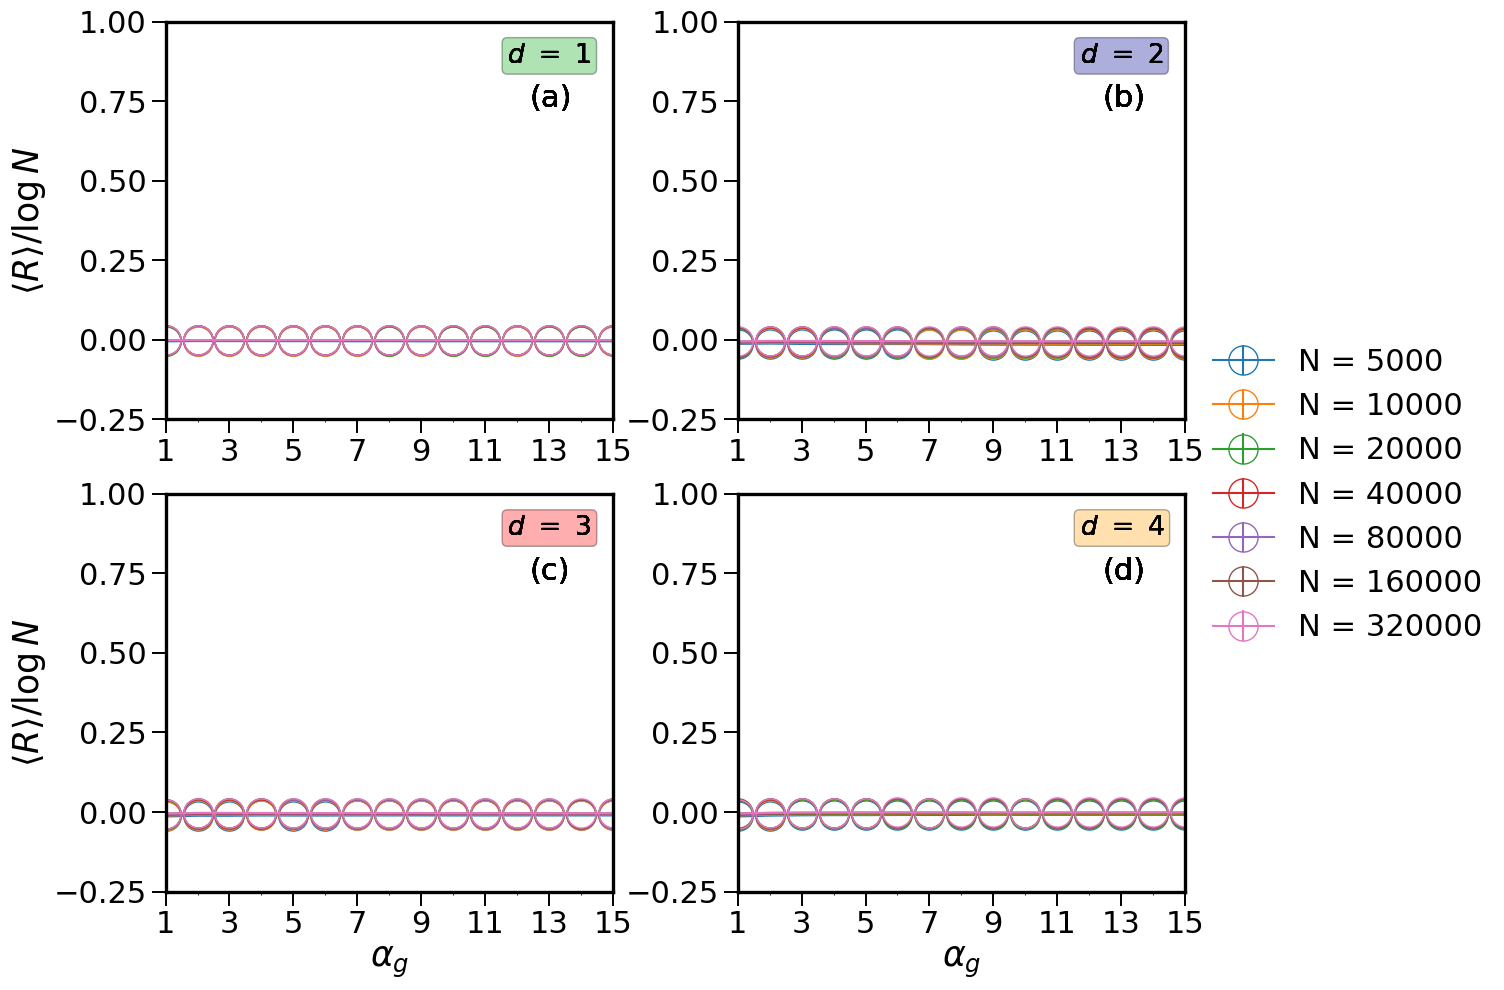

In [32]:
#R/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]
lab = ["(a)", "(b)", "(c)", "(d)"]
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['ass_coeff_mean']/np.log(N[i]),
                    yerr=df_ord['ass_coeff_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=.87, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        
        ax.text(x=12.4, y=.73, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.25, 1.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle/\log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/R_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

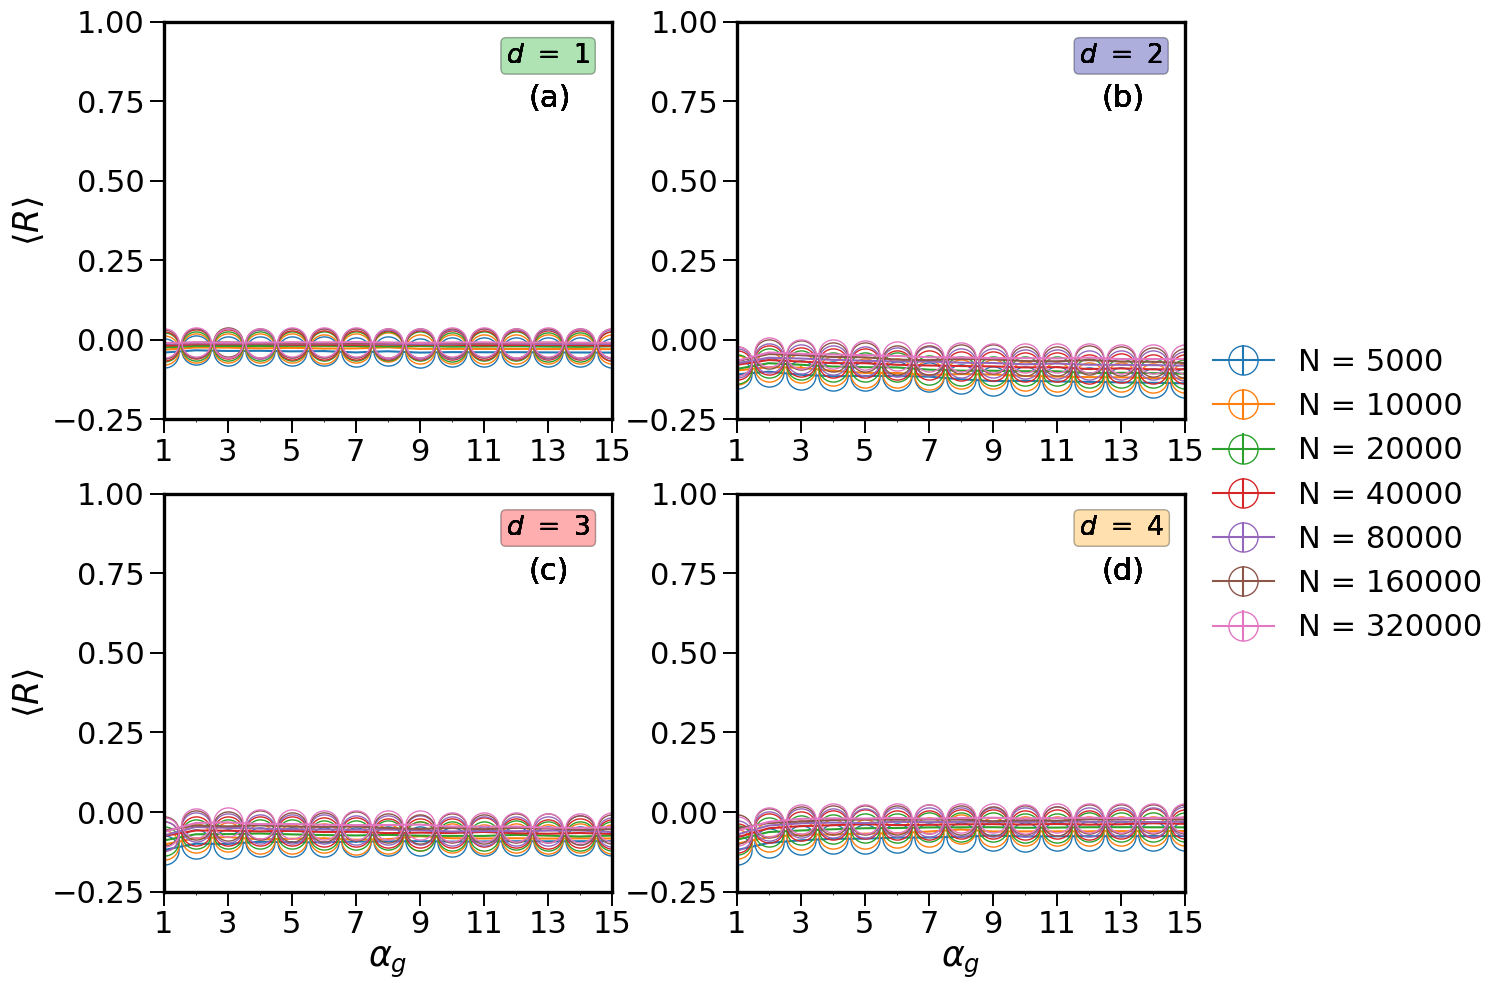

In [33]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['ass_coeff_mean'],
                    yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=.87, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.4, y=.73, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.25, 1.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/R_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

N = 5000, N_s = 16
N = 10000, N_s = 16
N = 20000, N_s = 16
N = 40000, N_s = 16
N = 80000, N_s = 16
N = 160000, N_s = 16
N = 320000, N_s = 15
N = 5000, N_s = 16
N = 10000, N_s = 16
N = 20000, N_s = 16
N = 40000, N_s = 16
N = 80000, N_s = 16
N = 160000, N_s = 16
N = 320000, N_s = 15
N = 5000, N_s = 16
N = 10000, N_s = 16
N = 20000, N_s = 16
N = 40000, N_s = 16
N = 80000, N_s = 16
N = 160000, N_s = 15
N = 320000, N_s = 16
N = 5000, N_s = 16
N = 10000, N_s = 16
N = 20000, N_s = 16
N = 40000, N_s = 16
N = 80000, N_s = 16
N = 160000, N_s = 15
N = 320000, N_s = 15


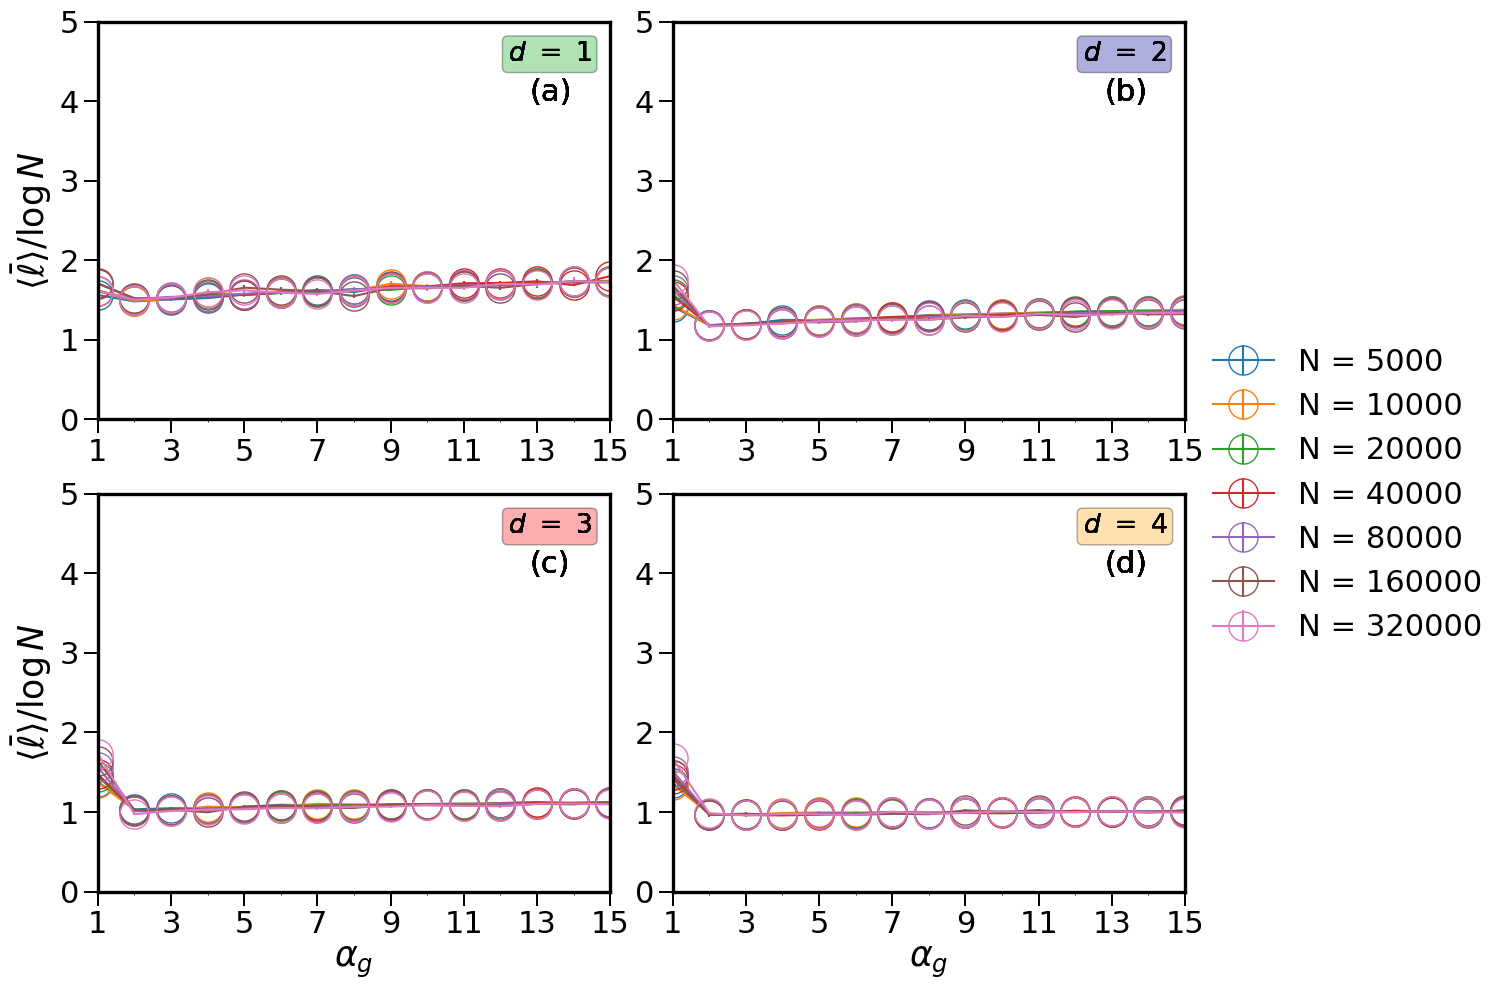

In [97]:
#SHORT/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['short_mean']/np.log(N[i]),
                    yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.2, y=4.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.8, y=4.0, s=lab[j], fontsize=22, color="black")
        print(f"N = {N[i]}, N_s = {len(df_ord['short_mean'])}")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0.0, 5])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/short_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

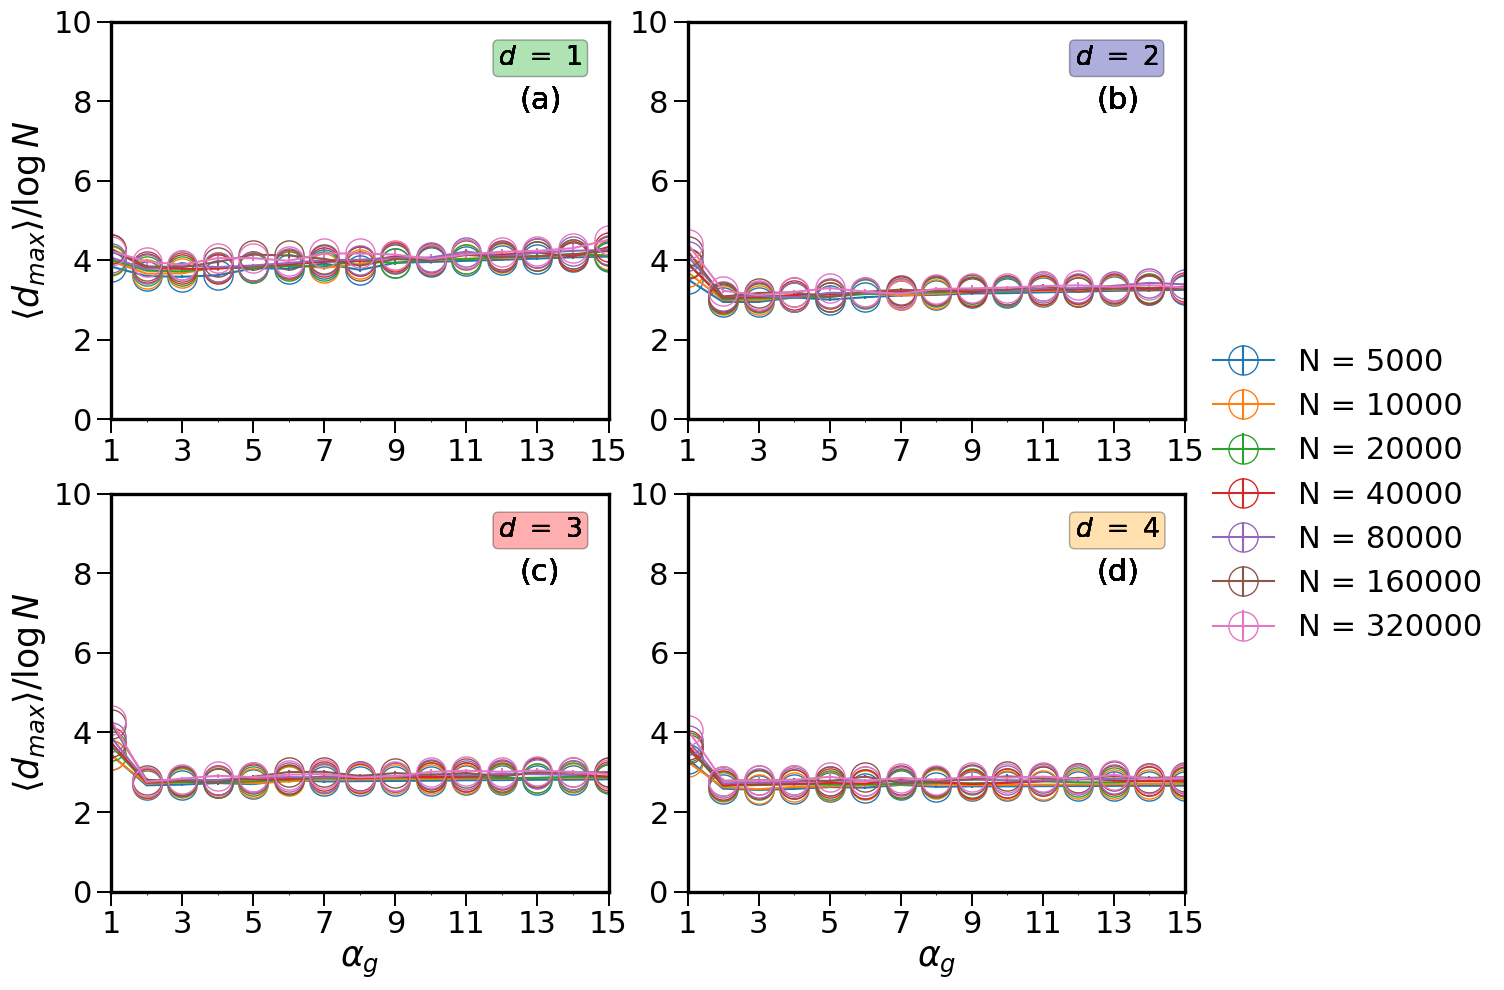

In [41]:
#DIAMETER/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=8.9, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.5, y=7.8, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/diameter_logN_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

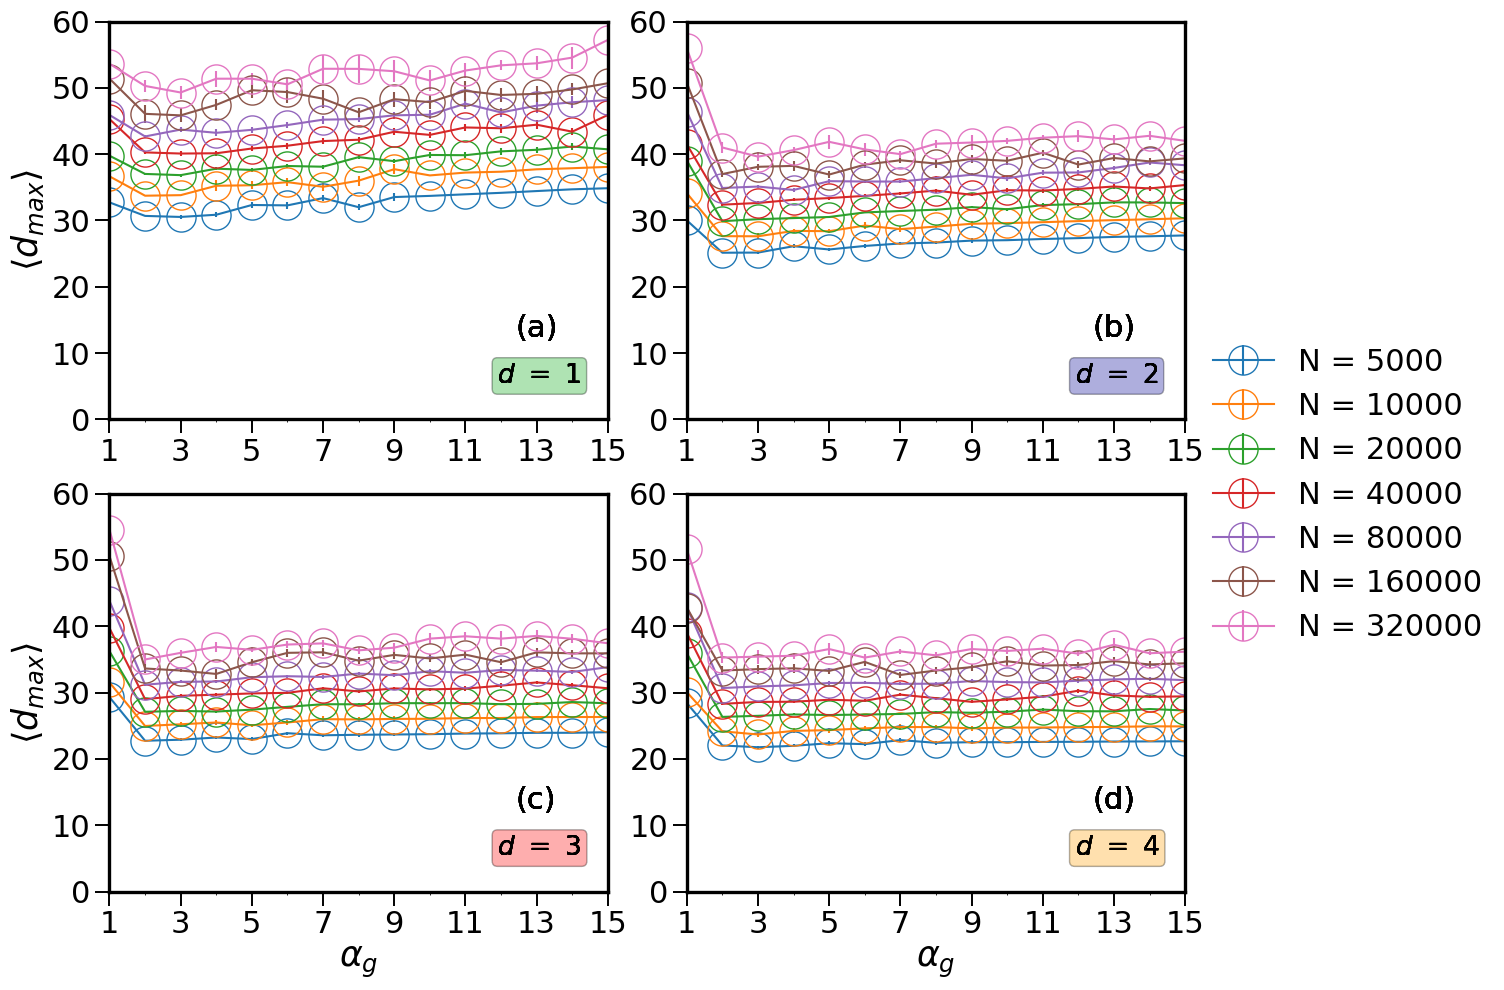

In [45]:
#DIAMETER VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_g'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.9, y=5.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.4, y=12.5, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([0, 60])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/diameter_multi_N_alpha_g.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_A$ FOR MULTIPLIES $N$

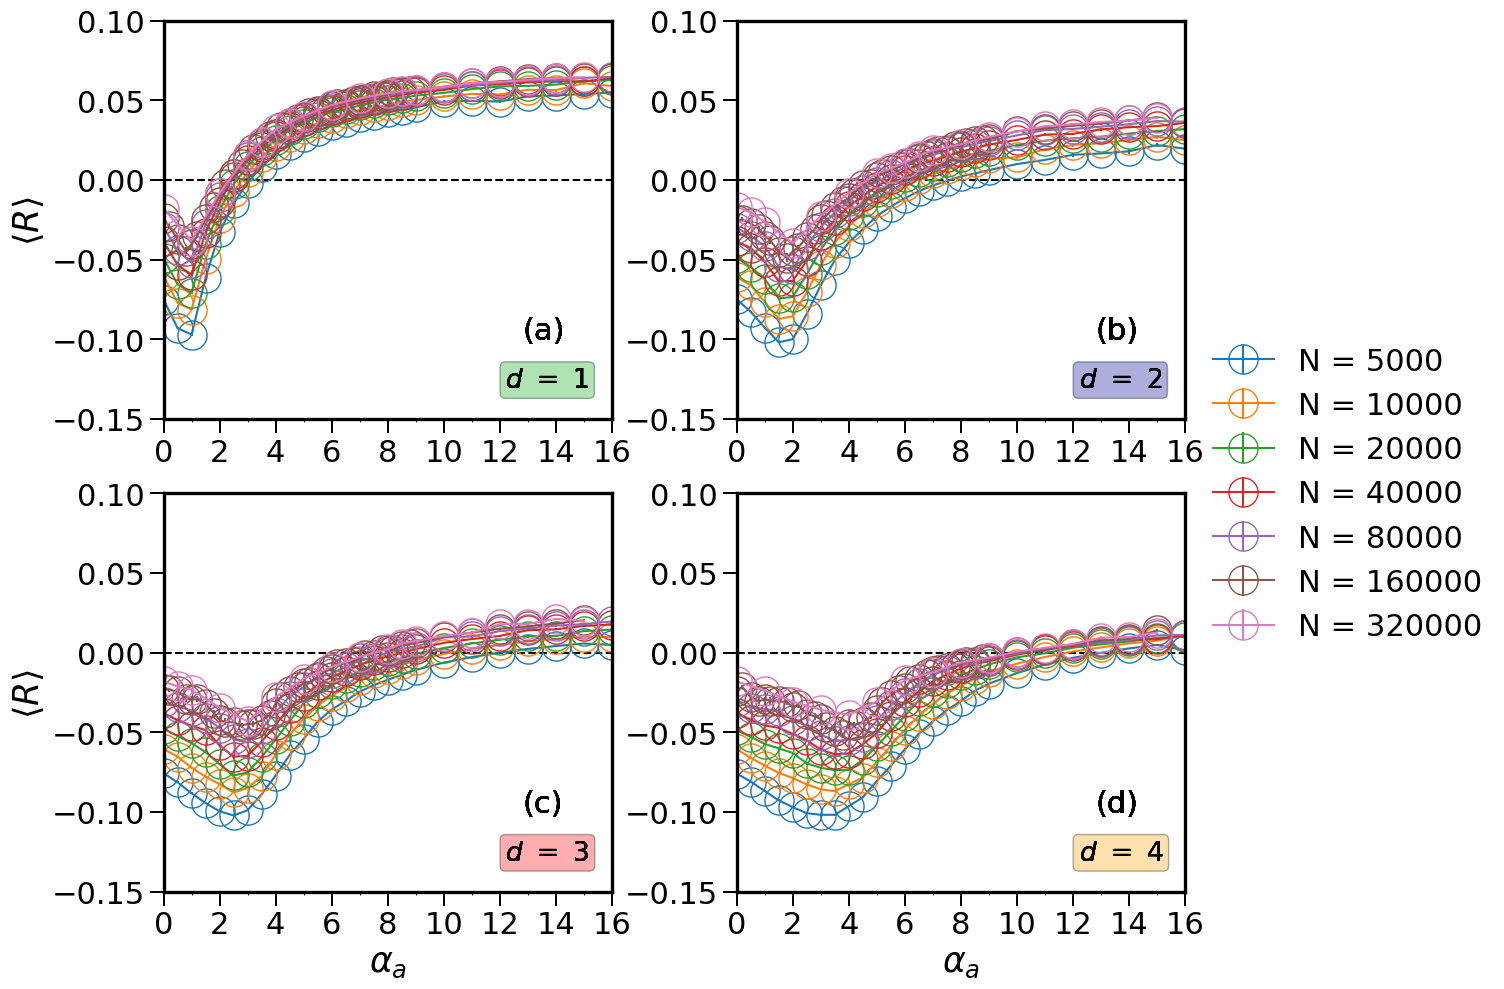

In [51]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                    yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.8, y=-.10, s=lab[j], fontsize=22, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.15, .10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

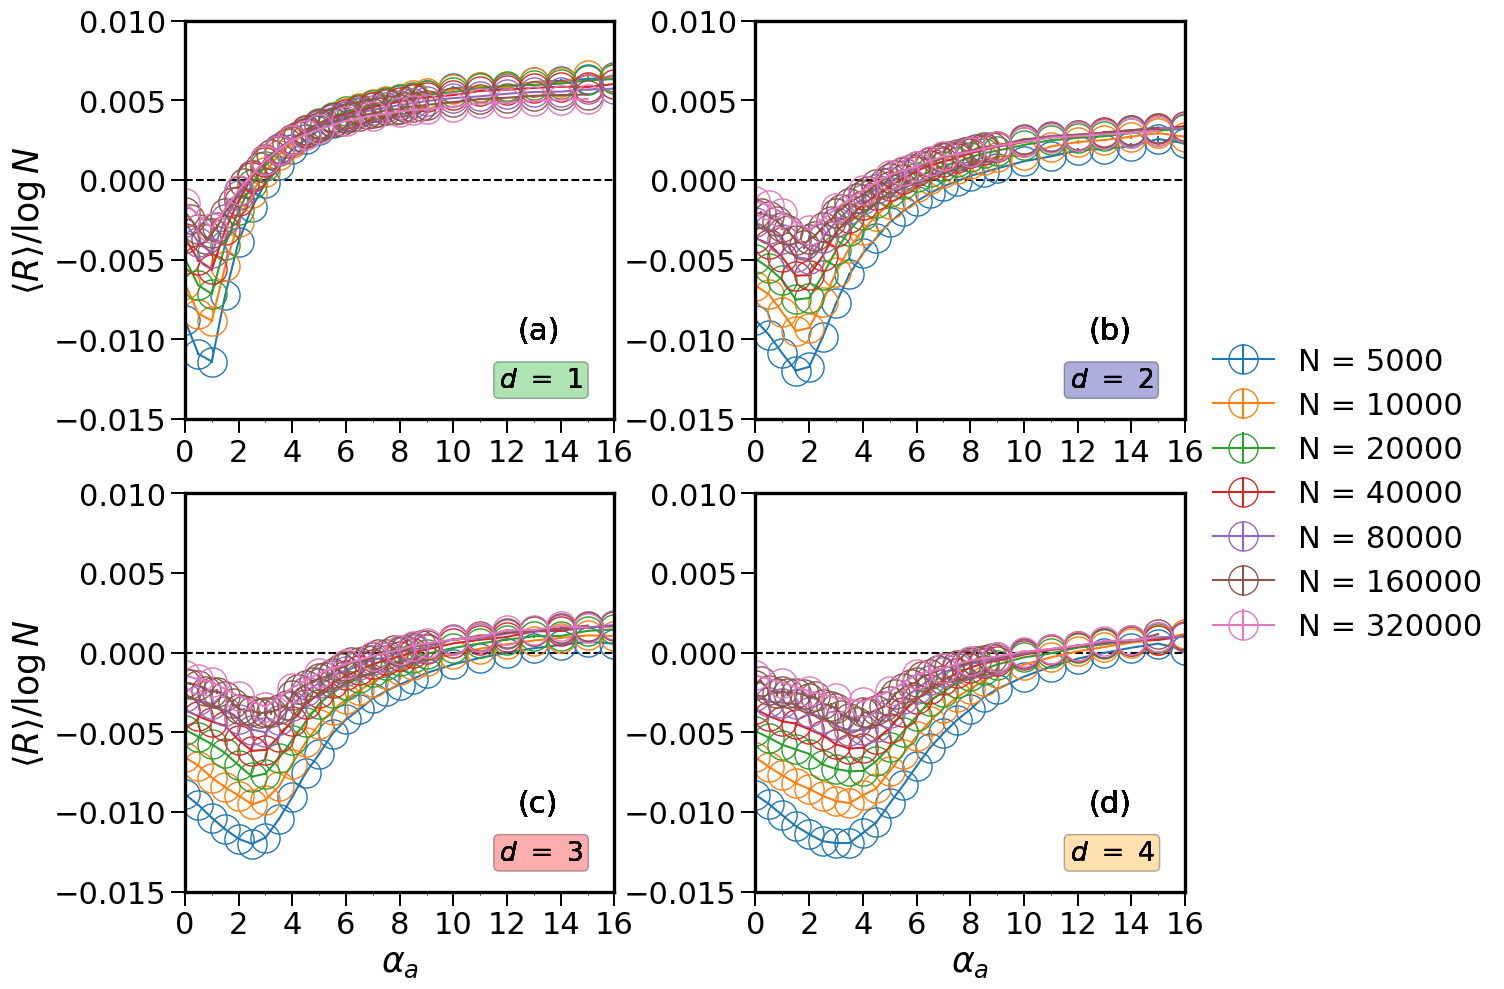

In [52]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean']/np.log(N[i]),
                    yerr=df_ord['ass_coeff_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=11.7, y=-.013, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.4, y=-.01, s=lab[j], fontsize=22, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.015, .010])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

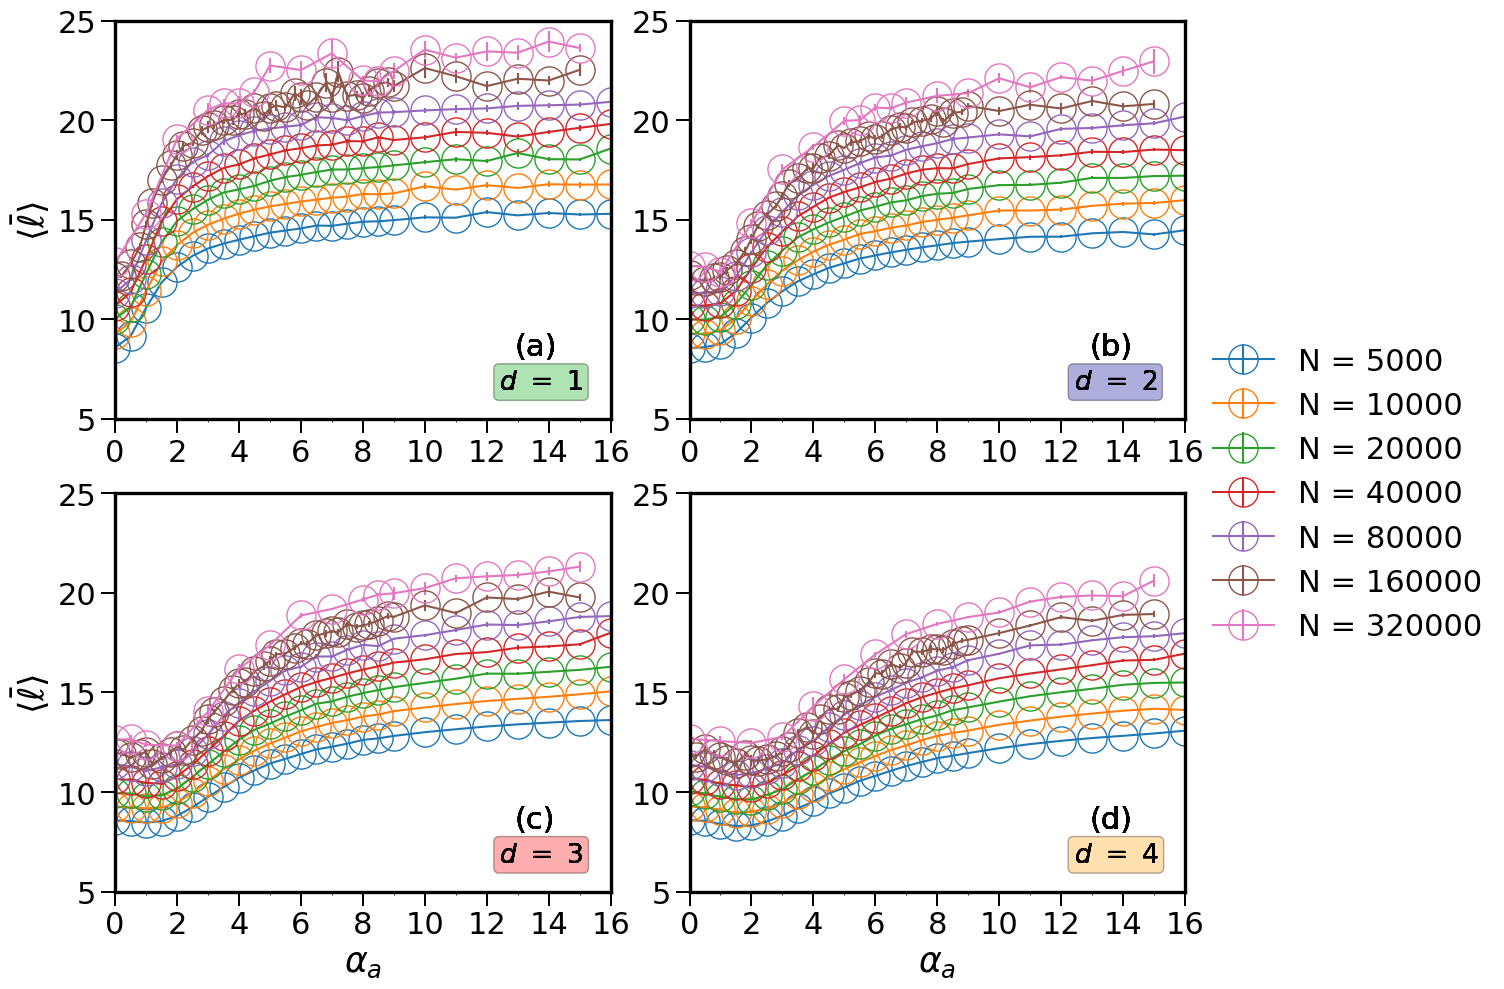

In [56]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
                    yerr=df_ord['short_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.4, y=6.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=12.9, y=8.2, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([5, 25])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

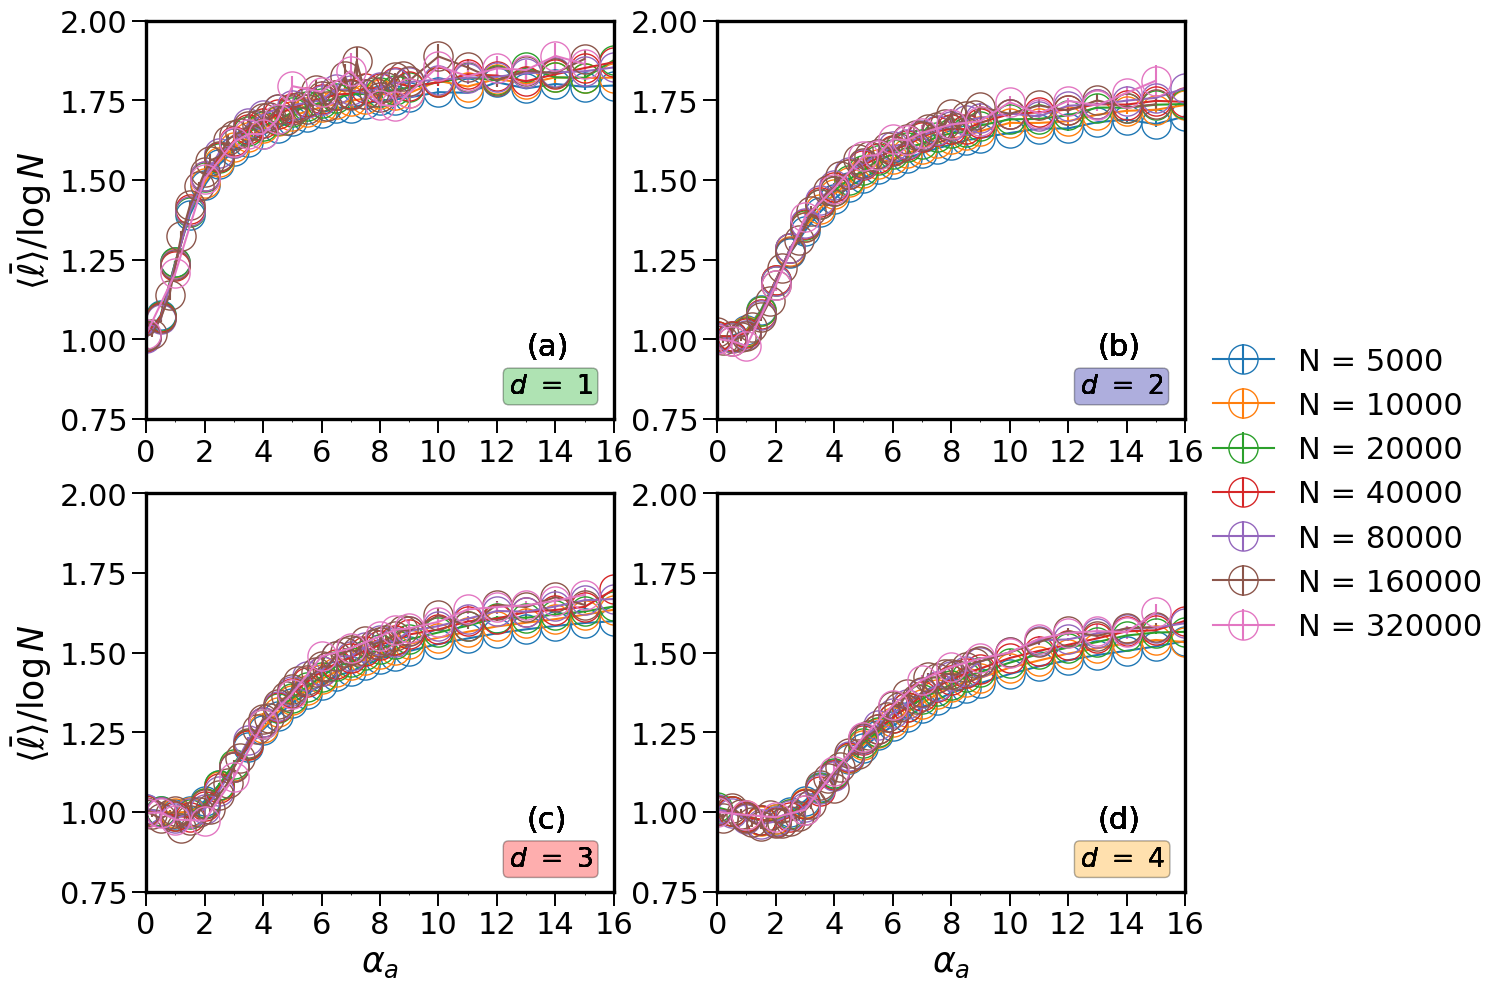

In [58]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['short_mean']/np.log(N[i]),
                    yerr=df_ord['short_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.4, y=0.83, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13, y=.95, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([0.75, 2])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle / \log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao 9lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

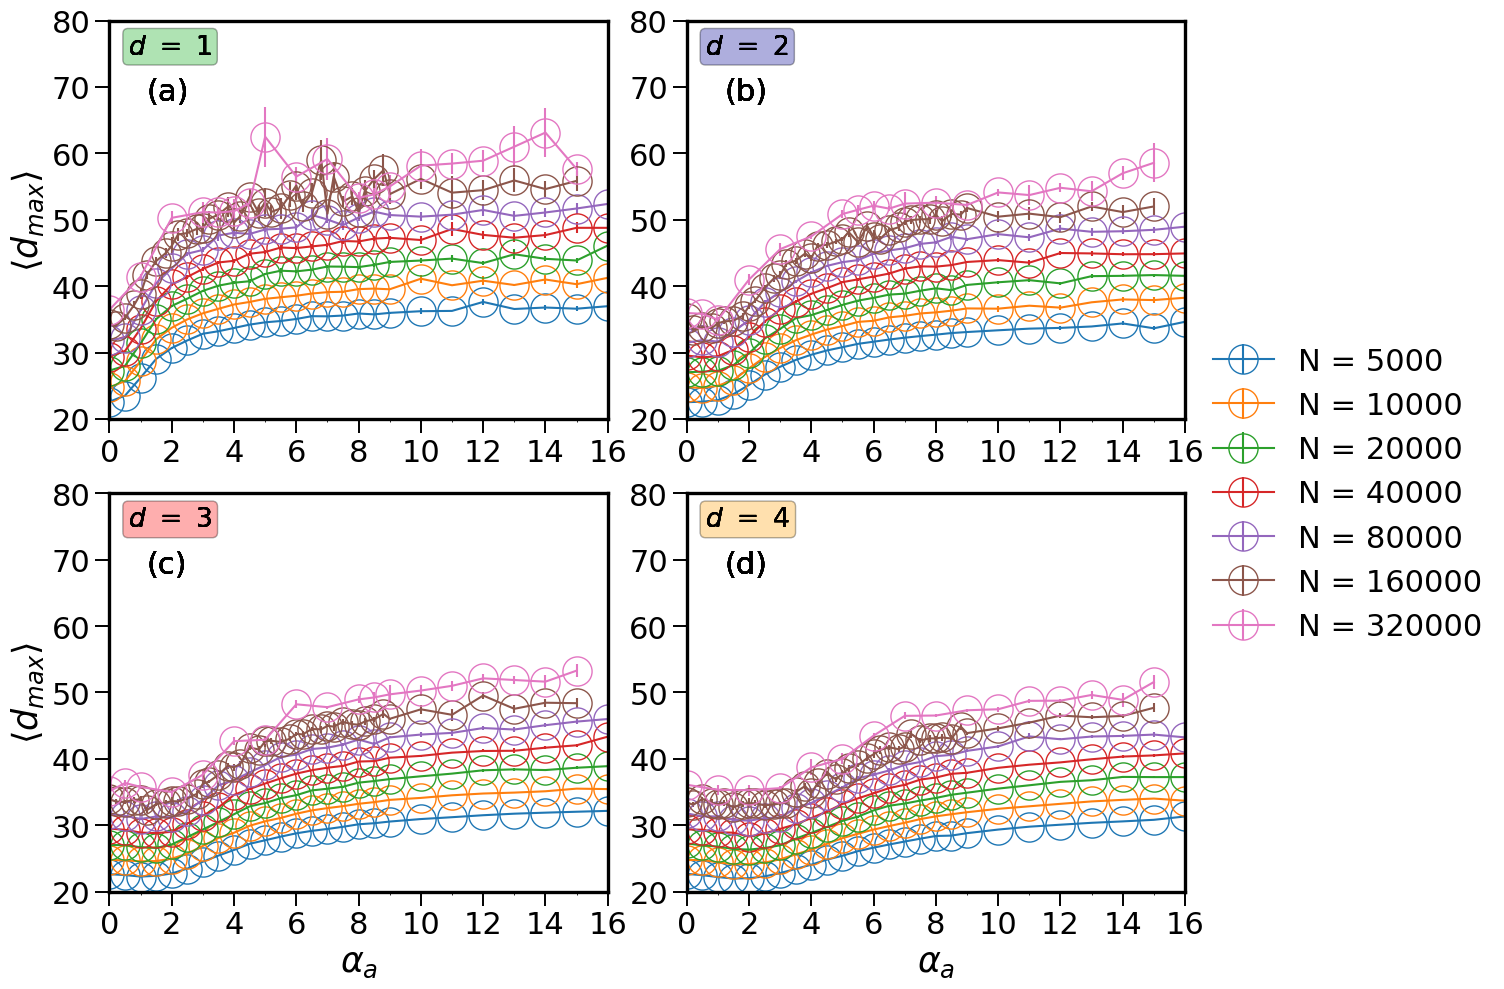

In [61]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean'],
                    yerr=df_ord['diameter_err'], linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=.6, y=75, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=1.2, y=68, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([20, 80])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/diameter_multi_N_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

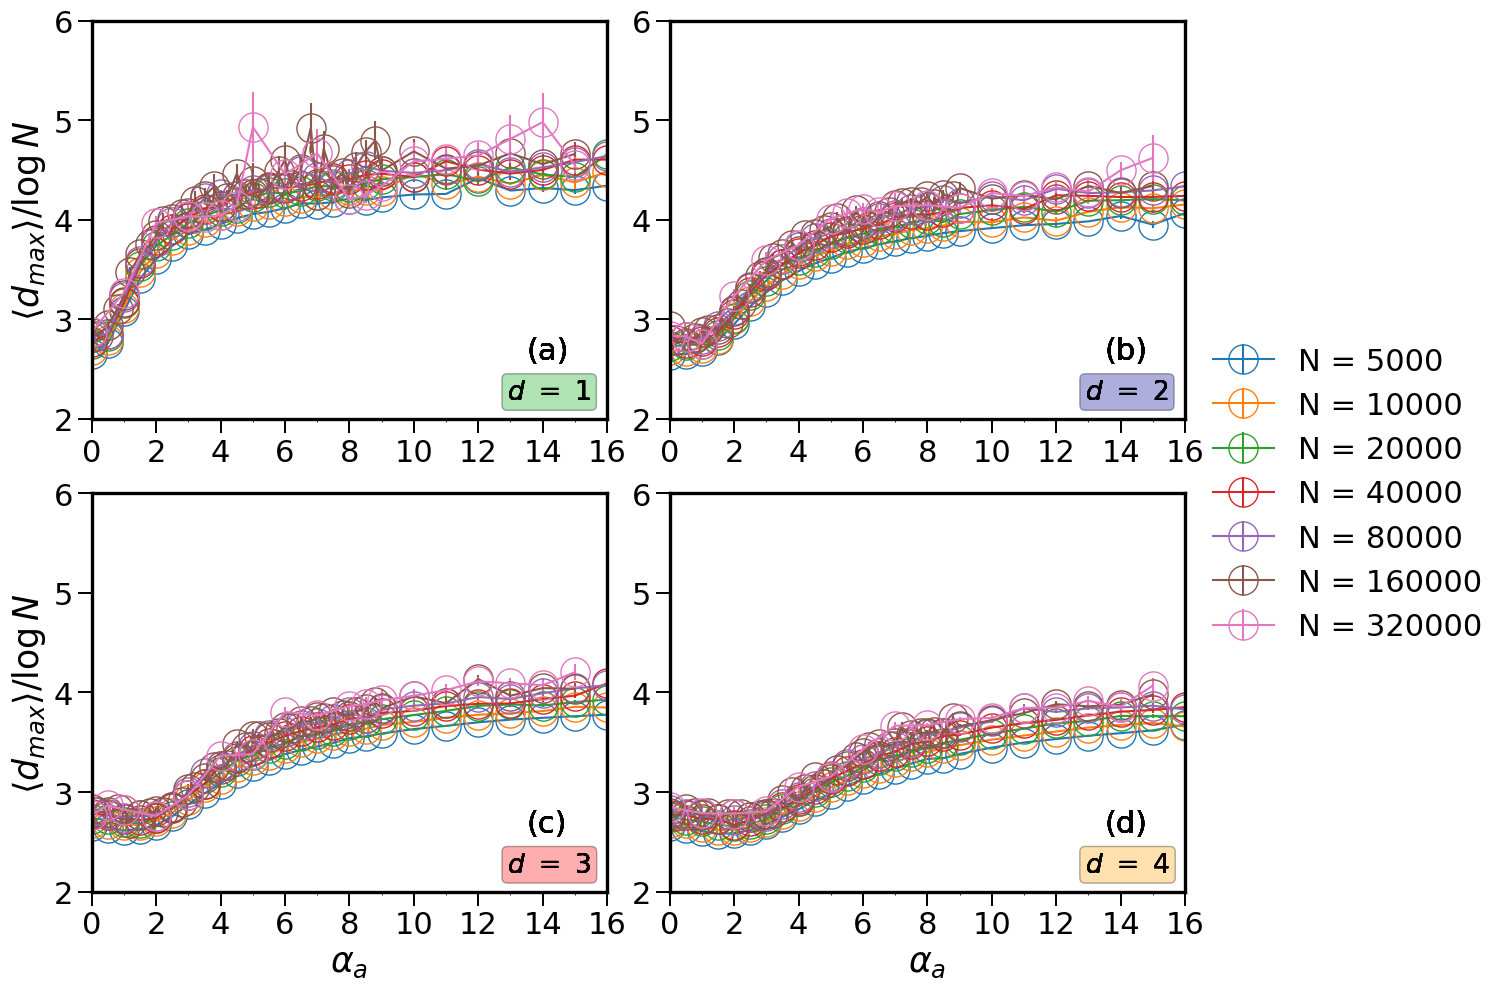

In [64]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"N = {n}" for n in N]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

        # Cria o gráfico de erro
        ax.errorbar(df_ord['alpha_a'], df_ord['diameter_mean']/np.log(N[i]),
                    yerr=df_ord['diameter_err']/np.log(N[i]), linestyle='-', marker='o',
                    label=labels[i], markersize=markersize, markerfacecolor='none')
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        ax.text(x=12.9, y=2.2, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
                color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.5, y=2.6, s=lab[j], fontsize=22, color="black")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([2, 6.0])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle/\log{N}$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/diameter_logN_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

## CALCULATE THE PROPERTIES LINEAR REGRESSION

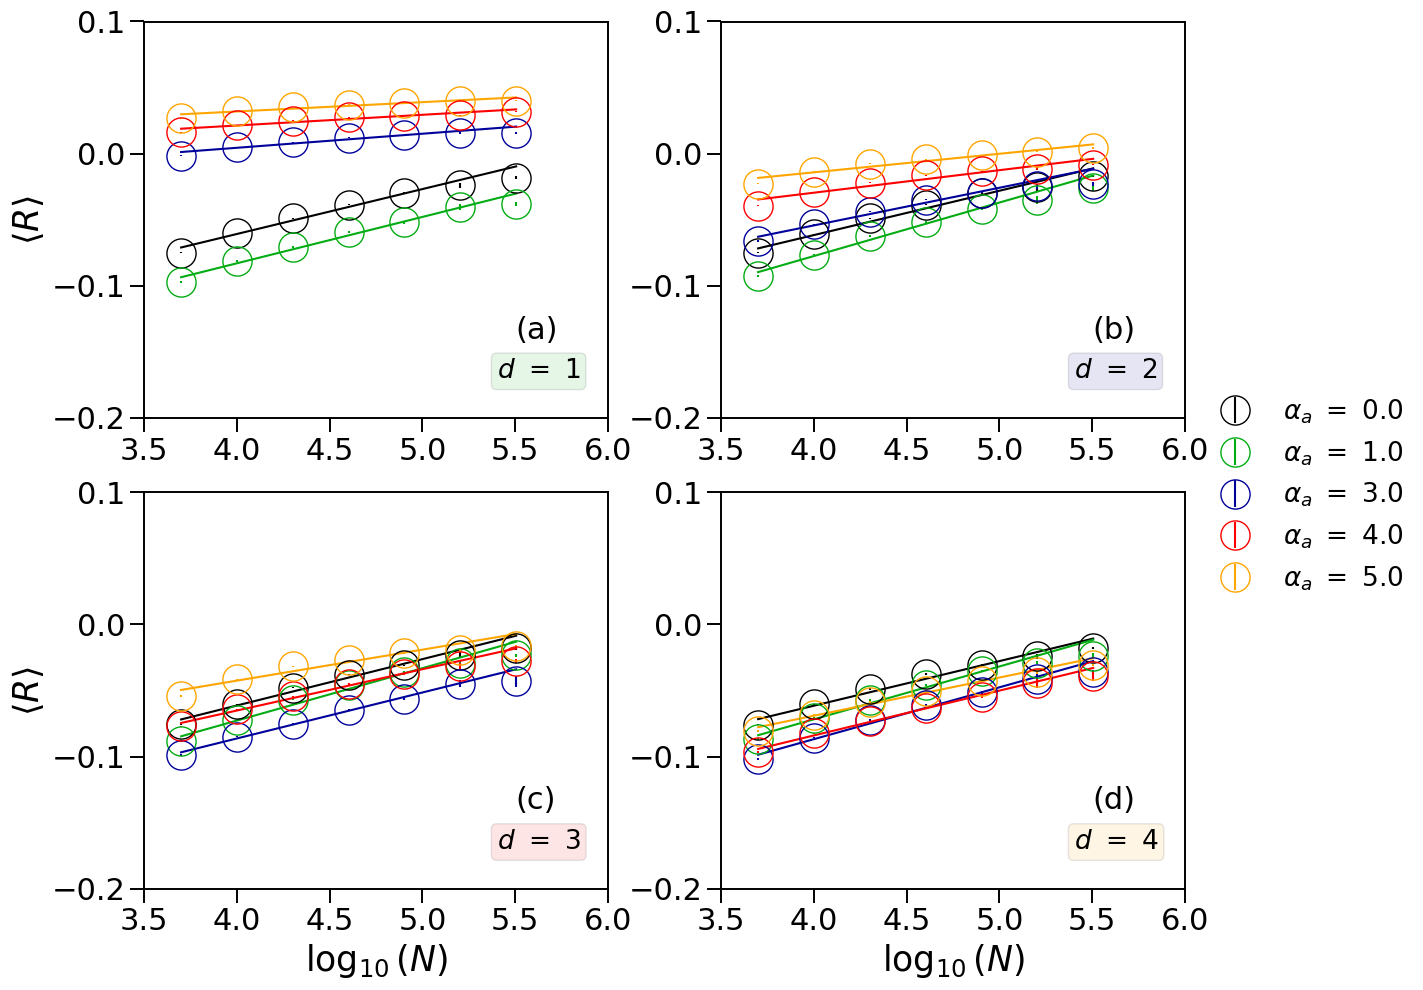

In [72]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["ass_coeff_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["ass_coeff_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=5.4, y=-.17, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.text(x=5.5, y=-.14, s=lab[count_box], fontsize=22, color="black")
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])
    ax.set_ylim([-0.2, 0.10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/R_linear_N.pdf", dpi=300)
plt.show()

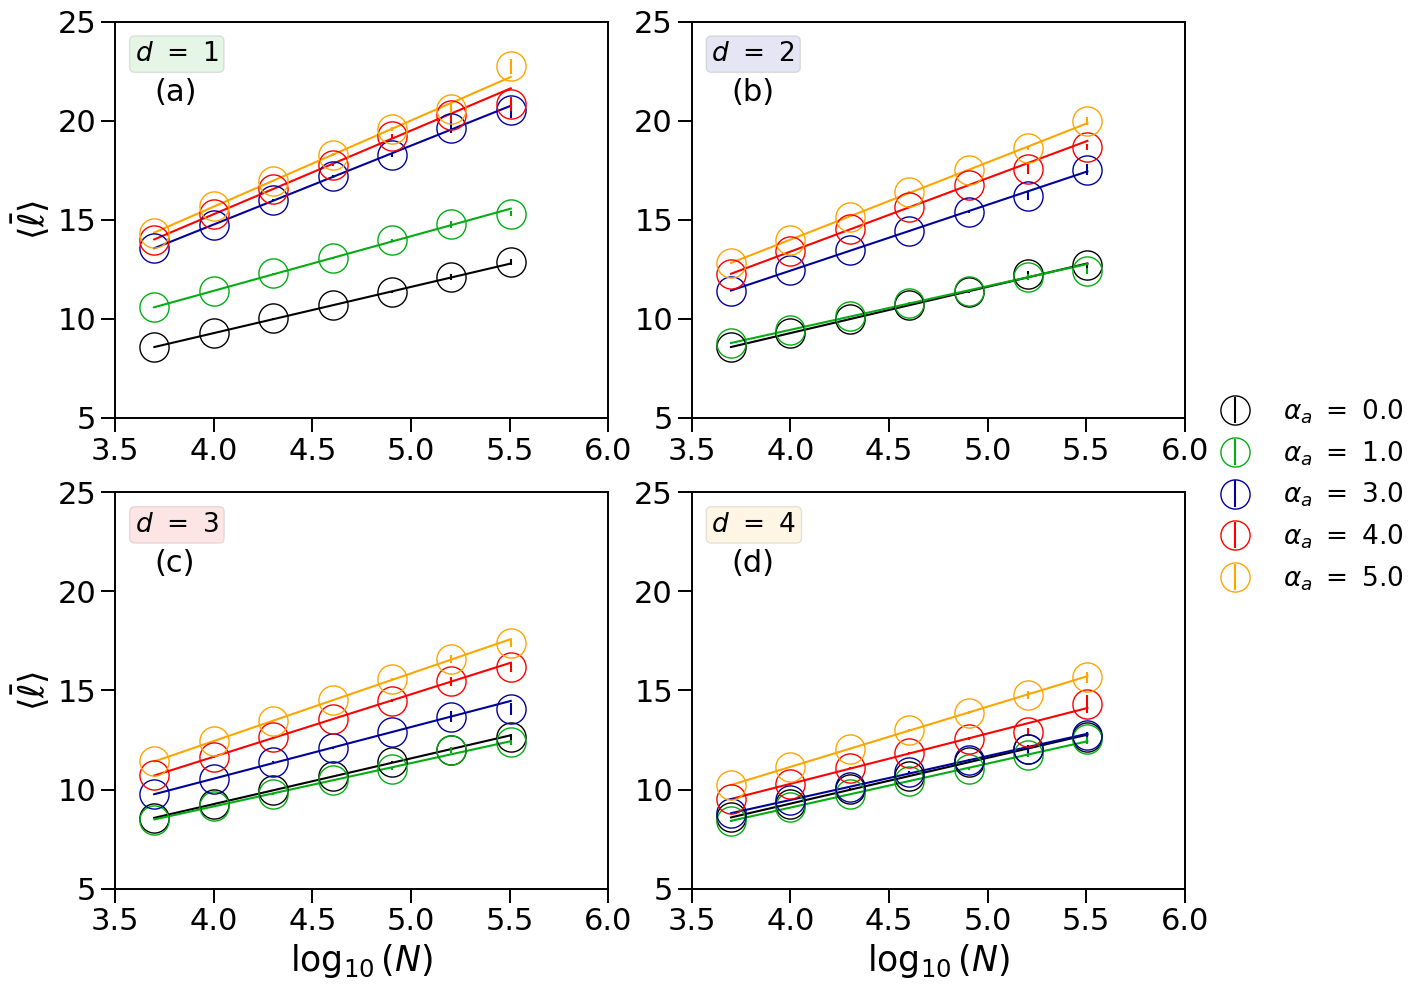

In [76]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["short_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["short_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=3.6, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.text(x=3.7, y=21, s=lab[count_box], fontsize=22, color="black")
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])

    ax.set_ylim([5, 25])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/short_linear_N.pdf", dpi=300)
plt.show()

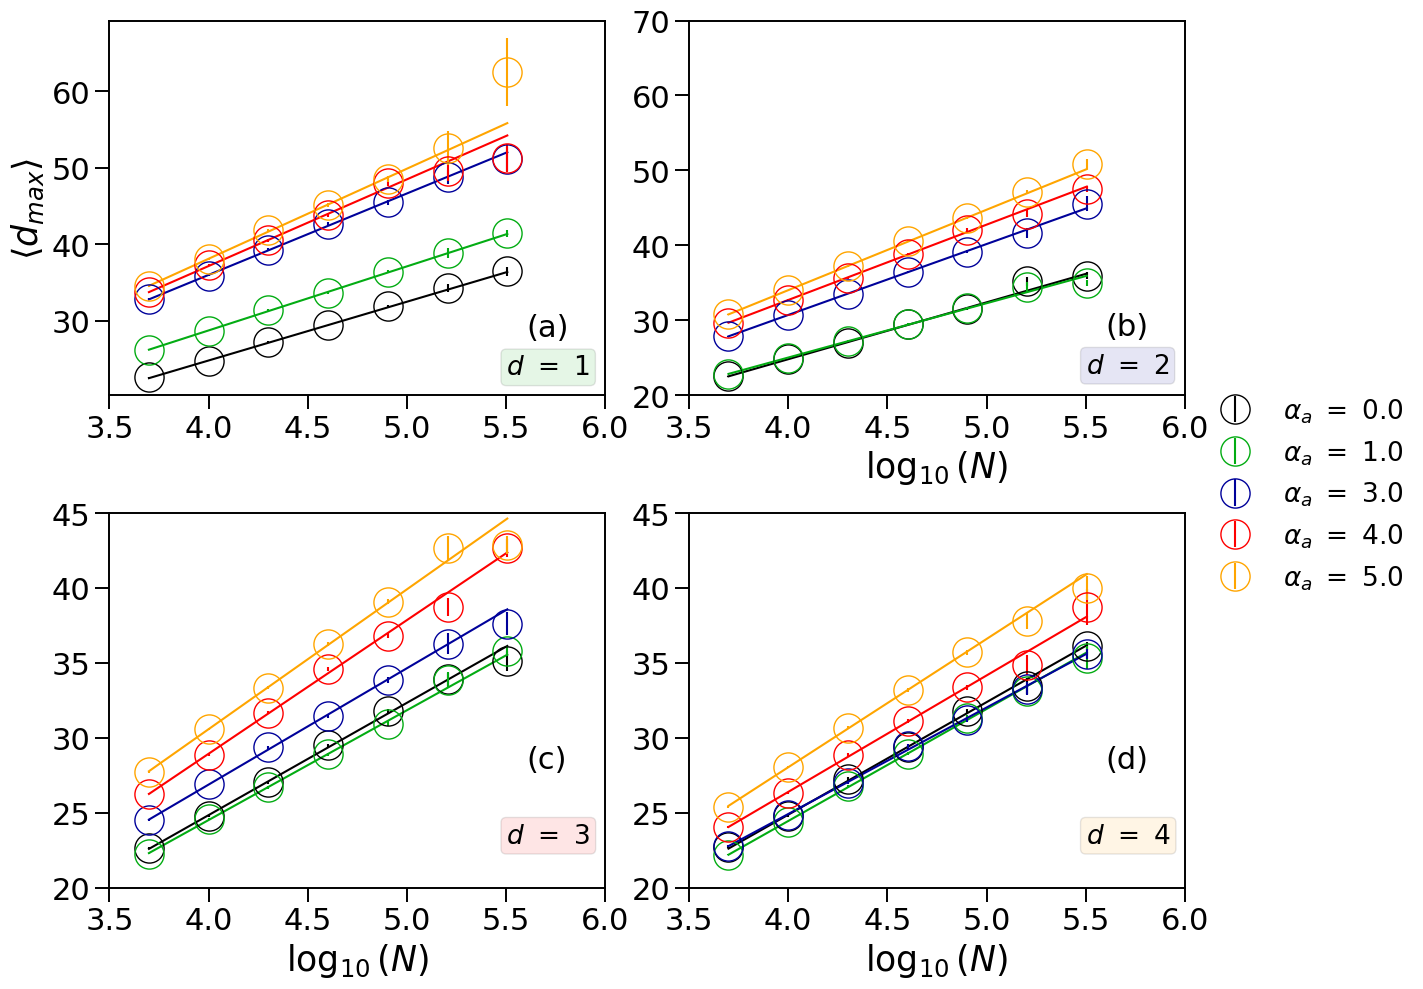

In [79]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                N_aux.append(n)
                prop.append(df_dim_alpha_a["diameter_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["diameter_err"].tolist()[0])
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        #print(type(np.log(N_aux)))
        # Plota o gráfico para o valor atual de alpha_a
        ax.errorbar(np.log10(N_aux), prop, yerr=prop_err, linestyle='None', marker='o',
                    label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
        ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
        count += 1
    
    ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.text(x=5.6, y=28, s=lab[count_box], fontsize=22, color="black")
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([3.5, 6])

    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 45])

    elif dim_idx in [1, 2]:  # Subplots na última linha
        ax.set_xlabel(r"$\log_{10}(N)$", size=25)
        ax.set_ylim([20, 70])
    
    elif dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle d_{max} \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/diameter_linear_N.pdf", dpi=300)
plt.show()

## CALCULATE LINEAR COEFFICIENT VERSUS $\alpha_a$

In [18]:
# Linear Regression calculate
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

coeff_all = {"alpha_a":[], "alpha_g":[], "dim":[], 
             "A_ass":[], "A_ass_err":[], "B_ass":[], "B_ass_err":[],
             "A_diameter":[], "A_diameter_err":[], "B_diameter":[], "B_diameter_err":[],
             "A_short":[], "A_short_err":[], "B_short":[], "B_short_err":[]}

properties = ["ass", "diameter", "short"]

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
        
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter:
        N_aux = []
        prop = []
        prop_err = []
        
        for j in range(len(properties)):
            # Loop sobre os diferentes valores de N
            for n in N:
                # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                
                # Adiciona os dados ao gráfico
                if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                    N_aux.append(n)
                    if(properties[j]=="ass"):
                        prop_name = "ass_coeff_mean"
                        prop_name_err = "ass_coeff_err"
                    
                    elif(properties[j]=="diameter"):
                        prop_name = "diameter_mean"
                        prop_name_err = "diameter_err"
                    
                    elif(properties[j]=="short"):
                        prop_name = "short_mean"
                        prop_name_err = "short_err"
                    
                    prop.append(df_dim_alpha_a[prop_name].tolist()[0])
                    prop_err.append(df_dim_alpha_a[prop_name_err].tolist()[0])

            regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=True)
                
            coeff_all[f"A_{properties[j]}"].append(regression[0])
            coeff_all[f"B_{properties[j]}"].append(regression[1])
            coeff_all[f"A_{properties[j]}_err"].append(regression[2])
            coeff_all[f"B_{properties[j]}_err"].append(regression[3])
            
        coeff_all["alpha_a"].append(alpha)
        coeff_all["dim"].append(dim)
        coeff_all["alpha_g"].append(2)

df_coeff = pd.DataFrame(data=coeff_all)
df_coeff.to_csv("../../data/coeff_linear.txt", sep=' ', index=False)
df_coeff.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.014757   0.001106 -0.196697   0.010589   
1      1.0        2    1  0.015235   0.001110 -0.223264   0.010921   
2      3.0        2    1  0.004621   0.000659 -0.038111   0.006726   
3      4.0        2    1  0.003513   0.000498 -0.011045   0.005158   
4      5.0        2    1  0.003067   0.000505  0.003671   0.005302   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.014369        0.059029   -0.191748        0.565066  0.012576   
1    0.014734        0.058307   -0.216749        0.573596  0.012880   
2    0.004499        0.020610   -0.036711        0.210217  0.003880   
3    0.003424        0.016163   -0.010022        0.167301  0.002915   
4    0.003003        0.013552    0.004417        0.142206  0.002607   

   A_short_err   B_short  B_short_err  
0     0.077094 -0.168997     0.737982  
1     0.070767 -0.193168     0.696151  
2     0.029722 -0.029534     0.303164  
3     0.024064 -0.004158     0.249079  
4     0.020786  0.009058     0.218119

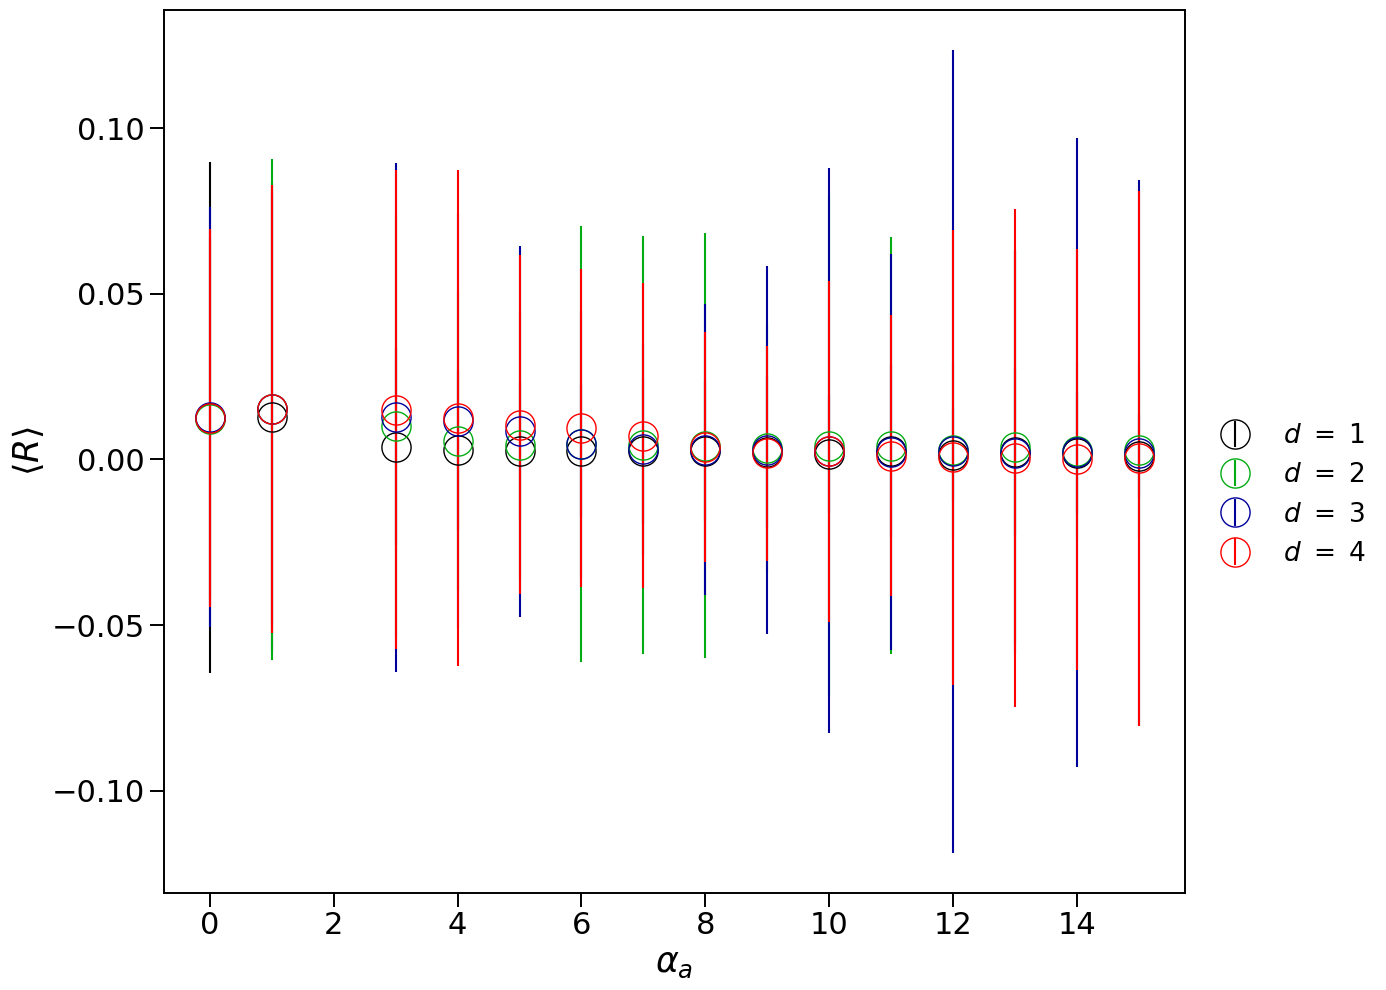

In [19]:
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
markersize = 21
thickness_axes = 1.4
colors = ["black", "#03AC13", "#00019a", "#fe0000", "orange"]

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
count = 0
for dim_idx, dim in enumerate(dimensions):
    df_dim = df_coeff[df_coeff["dim"]==dim]
    # Plota o gráfico para o valor atual de alpha_a
    ax.errorbar(df_dim["alpha_a"], df_dim["A_short"], yerr=df_dim["A_short_err"], linestyle='None', marker='o',
                label=rf"$\alpha_a$ $=$ ${alpha}$", markersize=markersize, markerfacecolor='none', color=colors[count])
    #ax.plot(np.log10(N_aux), regression,color=colors[count],label="_nolegend_")
    count += 1
    
    #ax.text(x=5.5, y=23, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
     #   color="black",bbox=dict(facecolor=colors_box[count_box], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    
    count_box +=1
    
    # Define os limites e configurações do eixo x e y
    #ax.set_xlim([3.5, 6])
    #ax.set_ylim([20, 70])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    #ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$d$ $=$ ${dim}$" for dim in dimensions], prop={"size": 19}, 
           fancybox=True, framealpha=0.0, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/N/ass_linear_coeff.pdf", dpi=300)
plt.show()

## PLOT TO UNIQUE N VALUE ($N$ $=$ $160000$) WITH $\alpha_g$ $=$ $2.0$

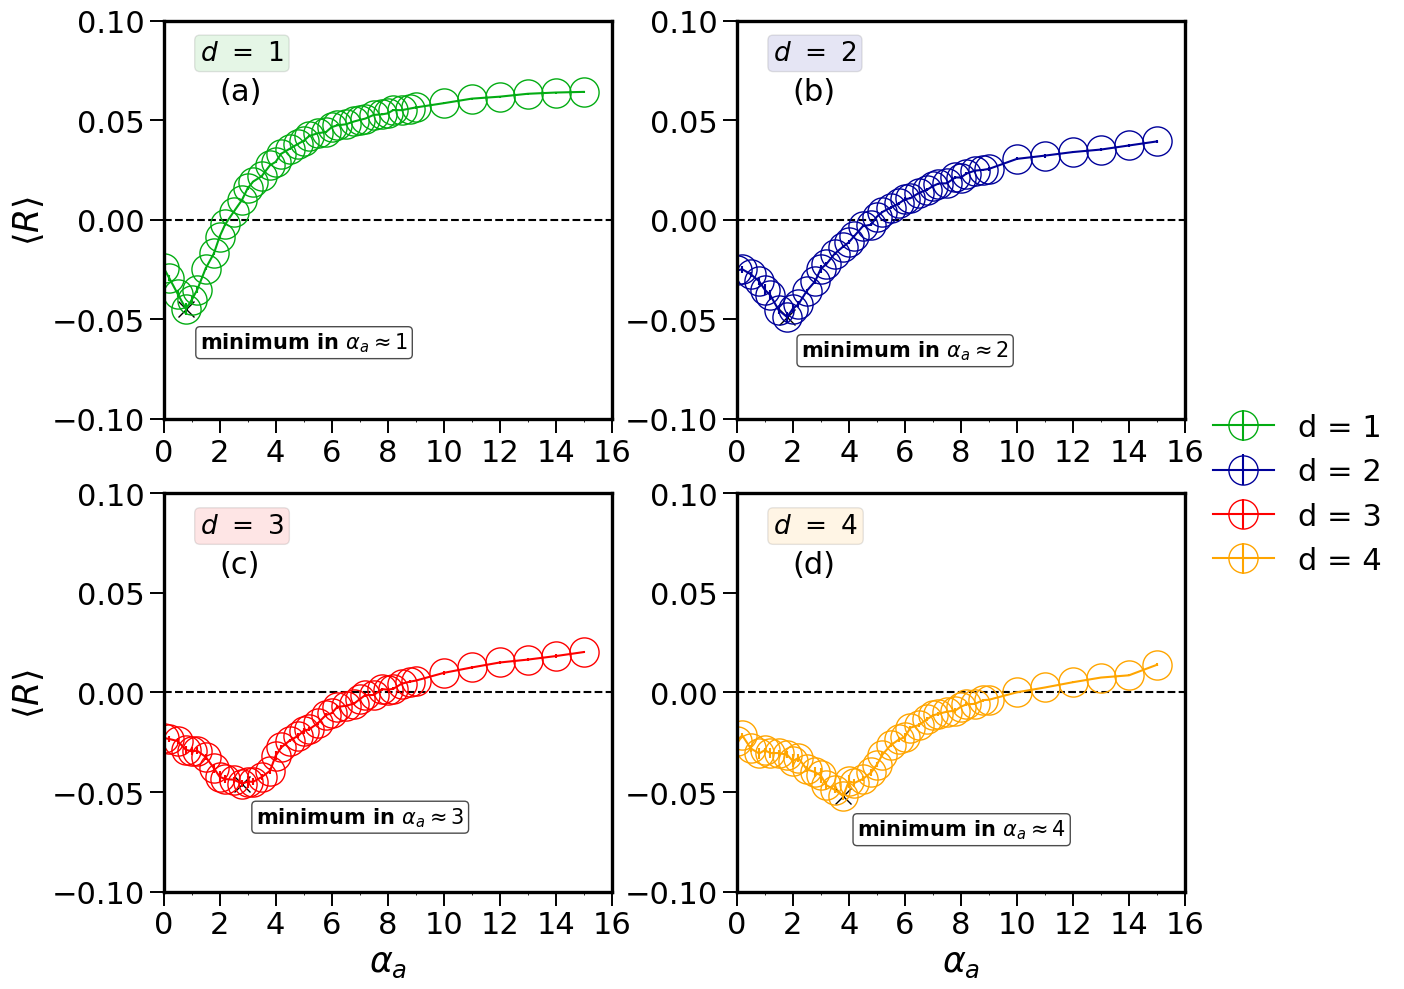

In [83]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # Calcula o mínimo
    min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    
    # Adiciona marcador no ponto mínimo
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')
    
    # Adiciona anotação para destacar o ponto
    ax.text(alpha_min + 0.5, value_min - 0.02,
            rf"minimum in $\alpha_a \approx {dim}$",
            fontsize=15, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    
    
    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    
    #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
    ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
            color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
    ax.text(x=2.0, y=.06, s=lab[j], fontsize=22, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([-.10, .10])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a.pdf", dpi=300, bbox_inches="tight")
plt.show()

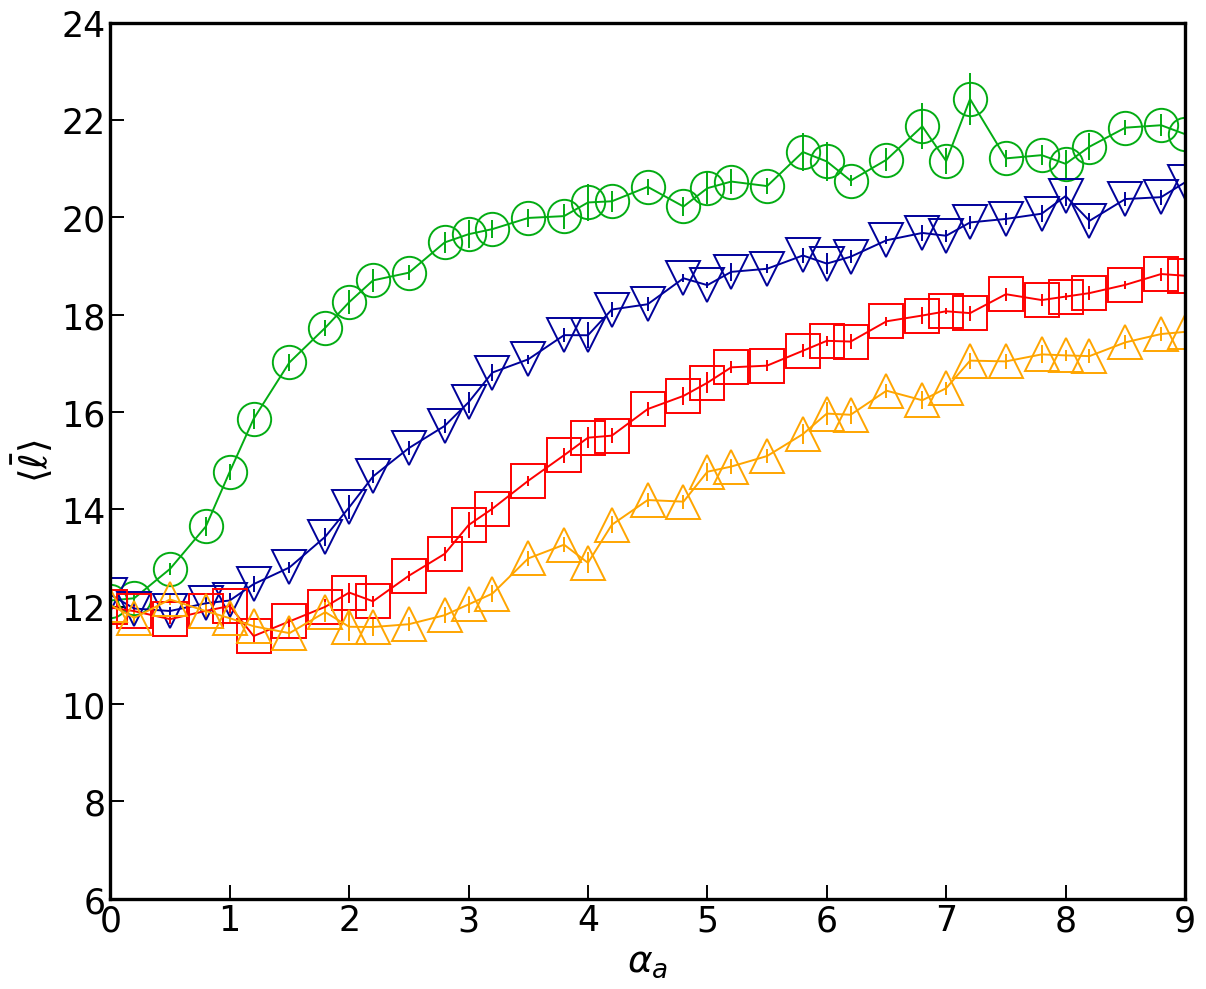

In [96]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
                yerr=df_ord['short_err'], linestyle='-', lw=1.4,marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
#ax.set_xlim([0, 15])
ax.set_xlim([0, 9])
ax.set_ylim([6, 24])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
# fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
#            loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/short_N_{N}_alpha_a_0-9.svg", dpi=300, bbox_inches="tight")
plt.show()

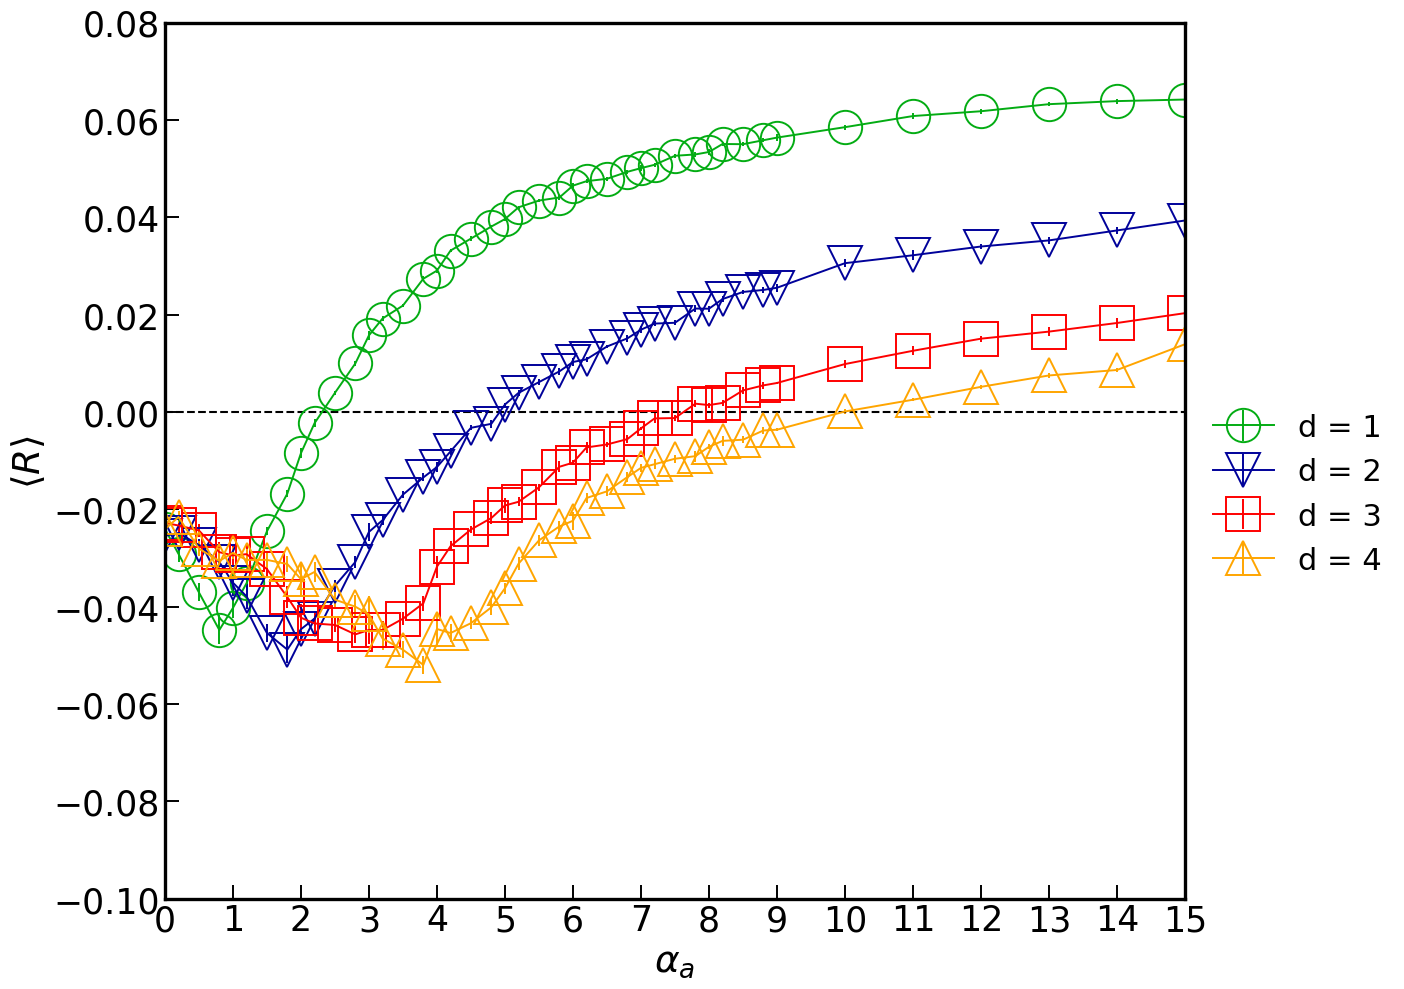

In [22]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$\langle R \rangle$", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_full.pdf", dpi=300, bbox_inches="tight")
plt.show()

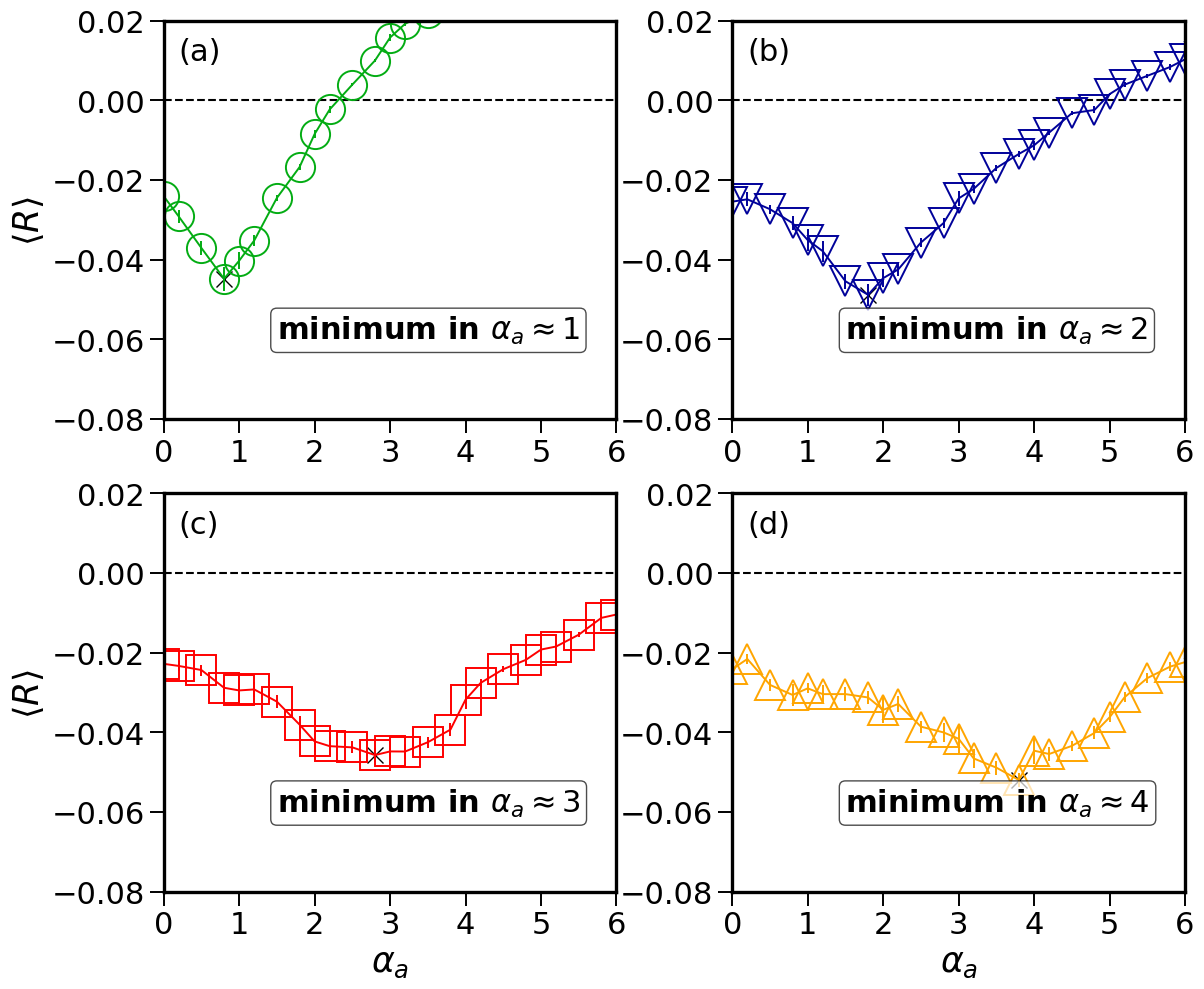

In [92]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 21
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]
markers = ['o', 'v', 's', '^', 'D']
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
    df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # Calcula o mínimo
    min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
    alpha_min = min_row['alpha_a']
    value_min = min_row['ass_coeff_mean']
    
    # Adiciona marcador no ponto mínimo
    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')
    
    # Adiciona anotação para destacar o ponto
    ax.text(1.5, -.06,
            rf"minimum in $\alpha_a \approx {dim}$",
            fontsize=22, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
    
    
    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
                yerr=df_ord['ass_coeff_err'], linestyle='-', lw=1.4 , marker=markers[j],mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    ax.text(x=.2, y=0.01, s=lab[j], fontsize=22, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 6])
    ax.set_ylim([-.08, .02])
    ax.tick_params('both', width=1.4, length=10, labelsize=22)

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$", size=25)
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$", size=25)

    # Define a espessura das bordas
    thickness_axes = 2.4
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_minimum_0-6.svg", dpi=300, bbox_inches="tight")
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a_minimum_0-6.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
df_parms = pd.read_csv("../../data/coeff_linear.txt", sep=' ')
df_parms.head()

alpha_a  alpha_g  dim     A_ass  A_ass_err     B_ass  B_ass_err  \
0      0.0        2    1  0.014757   0.001106 -0.196697   0.010589   
1      1.0        2    1  0.015235   0.001110 -0.223264   0.010921   
2      3.0        2    1  0.004621   0.000659 -0.038111   0.006726   
3      4.0        2    1  0.003513   0.000498 -0.011045   0.005158   
4      5.0        2    1  0.003067   0.000505  0.003671   0.005302   

   A_diameter  A_diameter_err  B_diameter  B_diameter_err   A_short  \
0    0.014369        0.059029   -0.191748        0.565066  0.012576   
1    0.014734        0.058307   -0.216749        0.573596  0.012880   
2    0.004499        0.020610   -0.036711        0.210217  0.003880   
3    0.003424        0.016163   -0.010022        0.167301  0.002915   
4    0.003003        0.013552    0.004417        0.142206  0.002607   

   A_short_err   B_short  B_short_err  
0     0.077094 -0.168997     0.737982  
1     0.070767 -0.193168     0.696151  
2     0.029722 -0.029534     0.303164  
3     0.024064 -0.004158     0.249079  
4     0.020786  0.009058     0.218119

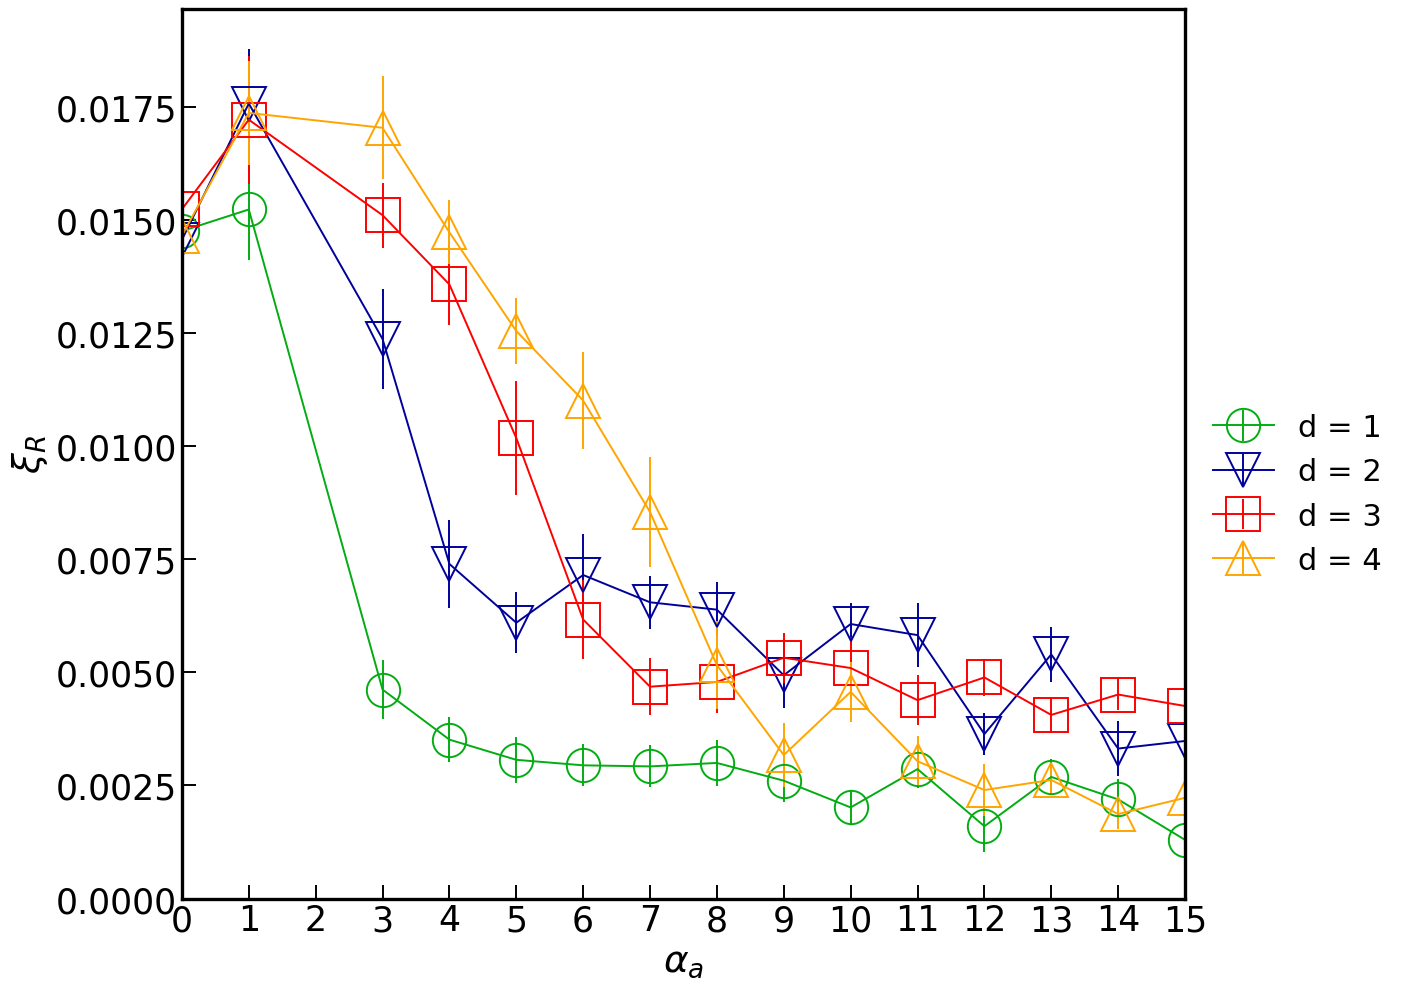

In [25]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim_alpha_a = df_parms[(df_parms['dim'] == dim)]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['A_ass'],
                yerr=df_ord['A_ass_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
#ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$ \xi_R $", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig(f"../../results/alpha_a/R_qsi_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()

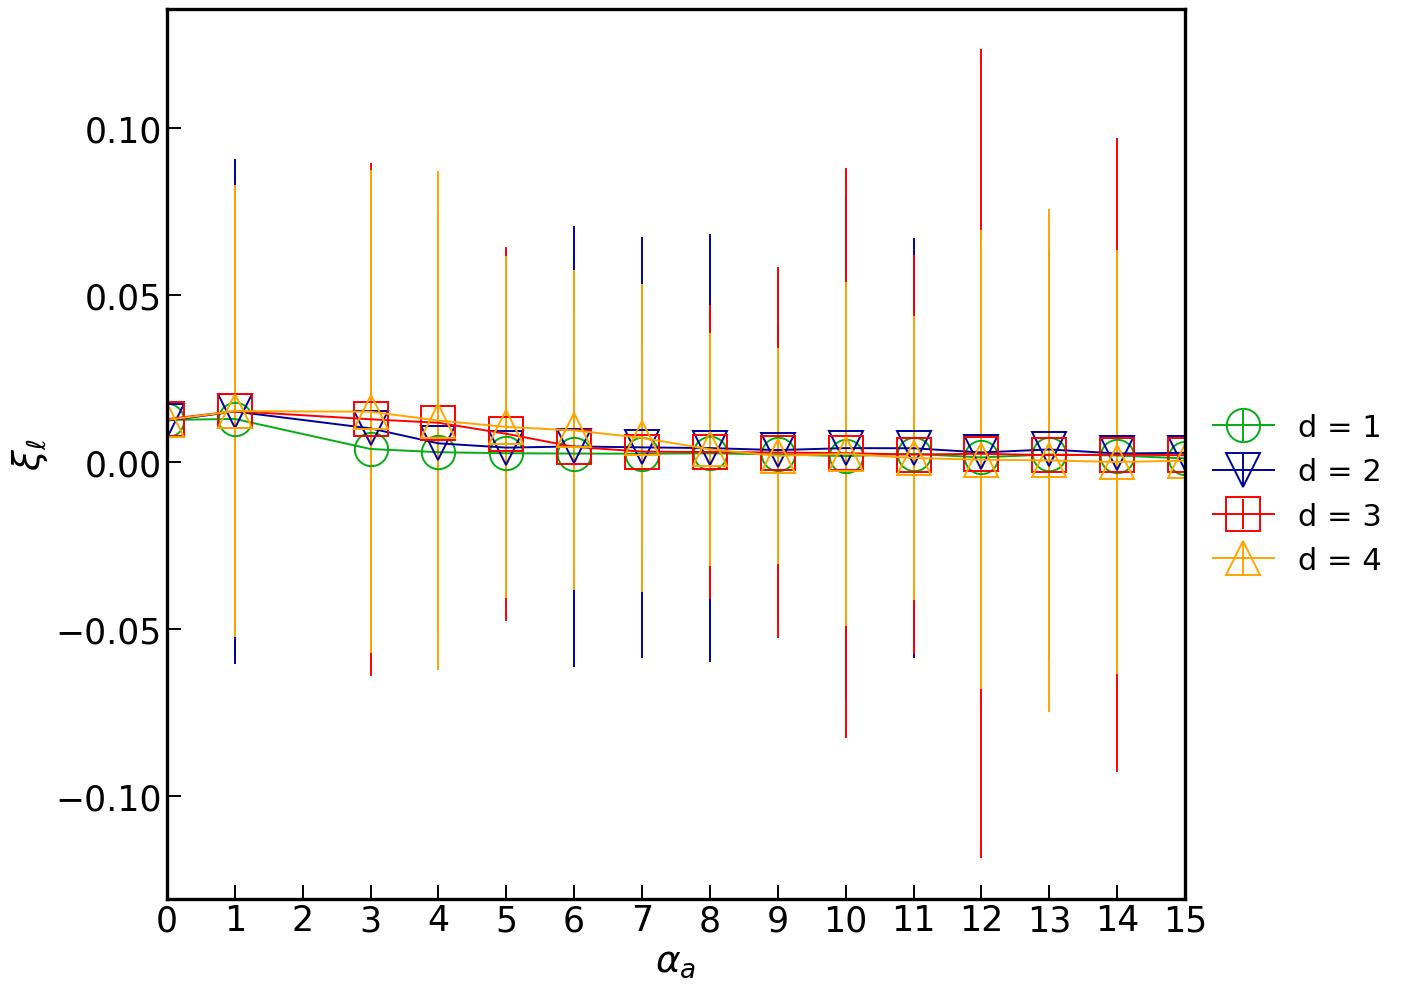

In [26]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = 160000
dimensions = [1, 2, 3, 4]
# Configuração da figura e subplots 2x2
fig, ax = plt.subplots(figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markers = ['o', 'v', 's', '^', 'D']
markersize = 24
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
colors = ["#03AC13", "#00019a", "#fe0000", "orange"]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim in dimensions:
    # Filtra o DataFrame para a dimensão e valor de N desejados
    df_dim_alpha_a = df_parms[(df_parms['dim'] == dim)]
    df_ord = df_dim_alpha_a.sort_values(by="alpha_a")

    # # Calcula o mínimo
    # min_row = df_ord.loc[df_ord['short_mean'].idxmin()]
    # alpha_min = min_row['alpha_a']
    # value_min = min_row['short_mean']

    # Adiciona marcador no ponto mínimo
    #    ax.plot(alpha_min, value_min, 'x', markersize=12, color='black', label='_nolegend_')

    # Adiciona anotação para destacar o ponto
    # ax.text(alpha_min + 0.5, value_min - 0.02,
    #         rf"minimum in $\alpha_a \approx {dim}$",
    #         fontsize=15, color='black', weight='bold',
    #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))


    # Cria o gráfico de erro
    ax.errorbar(df_ord['alpha_a'], df_ord['A_short'],
                yerr=df_ord['A_short_err'], linestyle='-', lw=1.4, marker=markers[j], mew=1.4,
                label=dim, markersize=markersize, color=colors[j] ,markerfacecolor='none')
    j+=1
#ax.hlines(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', label="_nolegend_")
#ax.text(x=1.3, y=.08, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

# Define os limites e configurações do eixo x e y
ax.set_xlim([0, 15])
#ax.set_ylim([-0.1, .08])
ax.tick_params('both', width=1.4, length=10, direction='in' ,labelsize=25)
# Define os multiplicadores dos ticks no eixo x com um step de 2
ax.xaxis.set_major_locator(MultipleLocator(1))


# Condições para exibir rótulos dos eixos em subplots específicos
ax.set_xlabel(r"$\alpha_a$", size=27)

ax.set_ylabel(r"$ \xi_\ell $", size=27)

# Define a espessura das bordas
thickness_axes = 2.4
for spine in ax.spines.values():
    spine.set_linewidth(thickness_axes)

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, prop={"size": 22}, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig(f"../../results/alpha_a/short_qsi_alpha_a_full.svg", dpi=300, bbox_inches="tight")
plt.show()